In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

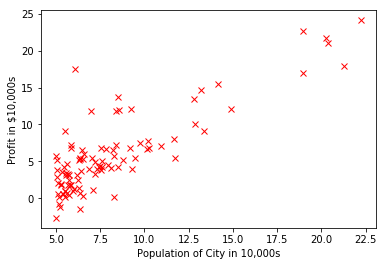

In [85]:
# Plotting Data

def plotData(x, y):
    plt.plot(x, y, 'rx')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

data = np.loadtxt('ex1data1.txt', delimiter = ',')
X_orig, y_orig = data[:, 0], data[:, 1]
m = y_orig.size

plotData(X_orig, y_orig)

In [95]:
# Cost

def computeCost(x, y, theta):
    m = y.shape[0]
    J = np.sum(np.square(np.dot(x, theta) - y)) / (2 * m)
    
    return J
            
X = np.stack([np.ones(m), X_orig], axis = 1)
y = y_orig.reshape(m,1)

theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01

J = computeCost(X, y, theta)
print('Wiht theta = [0 ; 0]\nCost computed = %f\n' %J)

Wiht theta = [0 ; 0]
Cost computed = 32.072734



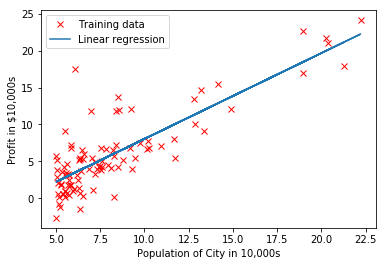

In [87]:
# Gredient descent

def gredientDescent(x, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = []
    
    for i in range(num_iters):
        theta = theta - alpha * np.dot(x.T, (np.dot(x, theta) - y)) / m
        J_history.append(computeCost(x, y, theta))
        
    return theta, J_history

theta, J_history = gredientDescent(X, y, theta, alpha, iterations)
plotData(X_orig, y_orig)
plt.plot(X_orig, np.dot(X, theta))
plt.legend(['Training data', 'Linear regression'])

Text(0.5, 1.0, 'Contour, showing minimum')

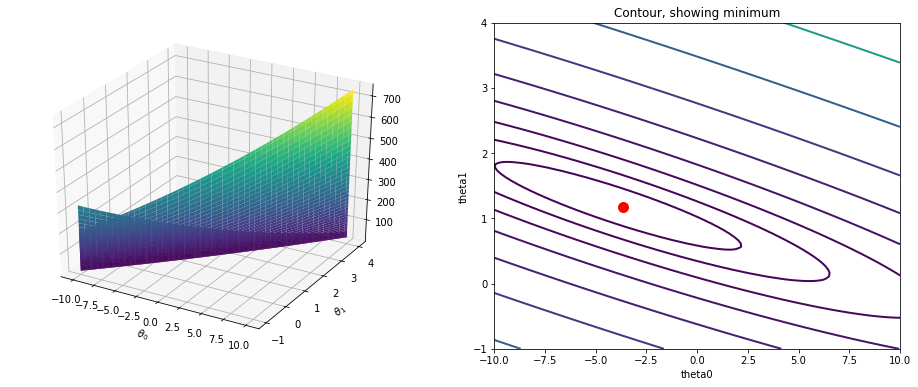

In [89]:
# Visualizing J

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, np.array([theta0, theta1]).reshape((2,1)))

J_vals = J_vals.T
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')